# Exploratory Analysis of SIADS 521 Survey Data

## In this notebook we hope to analyze responses to various survey questions
##### Eventually we will break down responses by different groups for further analysis

## Rules used in this notebook:
1. Document the process, not just the results:
    - I have clear headers throughout the notebook relaying different steps in the analysis
    - Along with these markdown headers I have inline comments and docstrings giving information about various methods

2. Use cell division to make steps clear:
    - Similarly stated above, I make use of markdown cells extensively in this notebook
    - Additionally, I do not lump all my code in a few cells
        - None of my cells are a page long or 100 lines long
        
3. Modularize code:
    - I make use of functions regularly in this notebook
    - Most of these functions assist in iteravely constructing and displaying plots
    - I have added docstrings to functions where appropriate

In [1]:
# imports

# pandas for data 
import pandas as pd

# numpy for math
import numpy as np

# all below for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import re
import squarify 
import plotly.express as px
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Data Loading and Manipulation

In [2]:
# importing dataframe 
df = pd.read_csv('resources/DataVizSurvey.csv')
df = df.drop('username', axis=1)
df.head()

How comfortable are you with your ability to debug an error in a python script?  \
0     64;27;9;Neither comfortable nor uncomfortable;                                
1     30;0;70;Neither comfortable nor uncomfortable;                                
2                            50;10;40;Uncomfortable;                                
3    25;25;50;Neither comfortable nor uncomfortable;                                
4    72;13;15;Neither comfortable nor uncomfortable;                                

  Doing well at programming tasks will enhance my career/job opportunities.  \
0                                    46;41;13;Agree;                          
1                                      4;0;96;Agree;                          
2                                     90;10;0;Agree;                          
3                                     10;0;90;Agree;                          
4                                     90;10;0;Agree;                          

  How comfortable are you with your ability to perform data visualization with python?  \
0     42;56;2;Neither comfortable nor uncomfortable;                                     
1    30;35;35;Neither comfortable nor uncomfortable;                                     
2    50;20;30;Neither comfortable nor uncomfortable;                                     
3                            40;50;10;Uncomfortable;                                     
4    24;49;27;Neither comfortable nor uncomfortable;                                     

  Doing well at data visualization will enhance my career/job opportunities.  \
0                                     73;27;0;Agree;                           
1                                      6;0;94;Agree;                           
2                                     20;0;80;Agree;                           
3                                     20;0;80;Agree;                           
4                                     87;13;0;Agree;                           

  I believe that my ability to complete programming tasks will increase my self worth.  \
0                                    42;21;37;Agree;                                     
1                                    11;51;38;Agree;                                     
2               50;30;20;Neither agree nor disagree;                                     
3                                    25;25;50;Agree;                                     
4                                   2;94;4;Disagree;                                     

  You have a certain amount of “programming intelligence”, and you can’t really do much to change it.  \
0                                 14;16;70;Disagree;                                                    
1                                  11;5;84;Disagree;                                                    
2                                  0;20;80;Disagree;                                                    
3                                 20;20;60;Disagree;                                                    
4                                     9;77;14;Agree;                                                    

  The feeling of satisfaction I get when successfully completing a programming task is greater than the feelings of frustration when I have unsolved errors/bugs.  \
0                                 46;12;42;Disagree;                                                                                                                
1                                      7;2;91;Agree;                                                                                                                
2                                     90;10;0;Agree;                                                                                                                
3                                     0;25;75;Agree;                                                                                                              

In [3]:
def translate(col):
    """Helper function for cleaning responses"""
    for ix, ans in enumerate(df[col]):
        if type(ans) != float:
            df.loc[ix, col] = (''.join([i for i in ans if i.isalpha()]))


In [4]:
# cleaning responses in each columnn
for col in df.columns:
    translate(col)

In [5]:
# dropping missing values
df = df.dropna()

In [6]:
# encoding variables for eventual heatmap

for col in df.columns:
    df[f'{col}_encoded'] = df[col].astype('category').cat.codes

In [7]:
# shortening and "transcribing" some of the answers
for col in df.loc[:, :'Have you ever visited New York City?'].columns:
    df[col] = df[col].apply(lambda x: 'neither' if len(x) > 21 else x)

In [8]:
# look at df after data wrangling
df.head()

How comfortable are you with your ability to debug an error in a python script?  \
0                                            neither                                
1                                            neither                                
2                                      Uncomfortable                                
3                                            neither                                
4                                            neither                                

  Doing well at programming tasks will enhance my career/job opportunities.  \
0                                              Agree                          
1                                              Agree                          
2                                              Agree                          
3                                              Agree                          
4                                              Agree                          

  How comfortable are you with your ability to perform data visualization with python?  \
0                                            neither                                     
1                                            neither                                     
2                                            neither                                     
3                                      Uncomfortable                                     
4                                            neither                                     

  Doing well at data visualization will enhance my career/job opportunities.  \
0                                              Agree                           
1                                              Agree                           
2                                              Agree                           
3                                              Agree                           
4                                              Agree                           

  I believe that my ability to complete programming tasks will increase my self worth.  \
0                                              Agree                                     
1                                              Agree                                     
2                                            neither                                     
3                                              Agree                                     
4                                           Disagree                                     

  You have a certain amount of “programming intelligence”, and you can’t really do much to change it.  \
0                                           Disagree                                                    
1                                           Disagree                                                    
2                                           Disagree                                                    
3                                           Disagree                                                    
4                                              Agree                                                    

  The feeling of satisfaction I get when successfully completing a programming task is greater than the feelings of frustration when I have unsolved errors/bugs.  \
0                                           Disagree                                                                                                                
1                                              Agree                                                                                                                
2                                              Agree                                                                                                                
3                                              Agree                                                                                                              

## Simple Plots for Initial Analysis

### How did respondents answer questions?

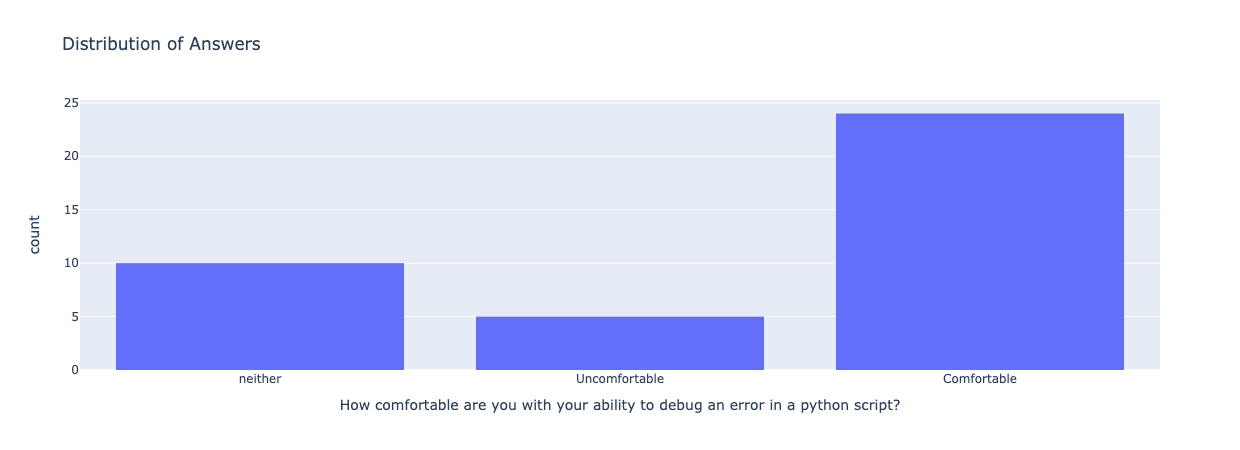

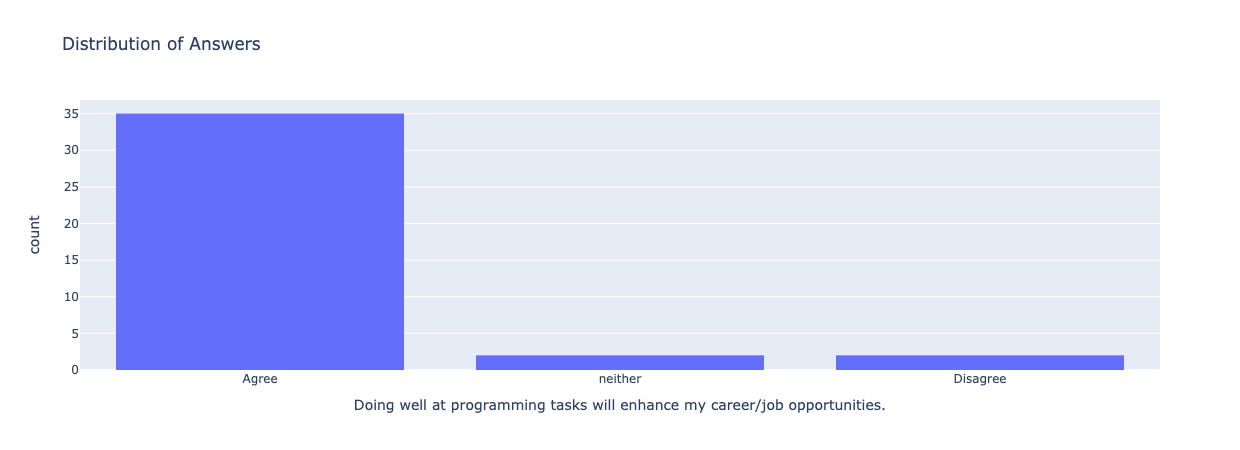

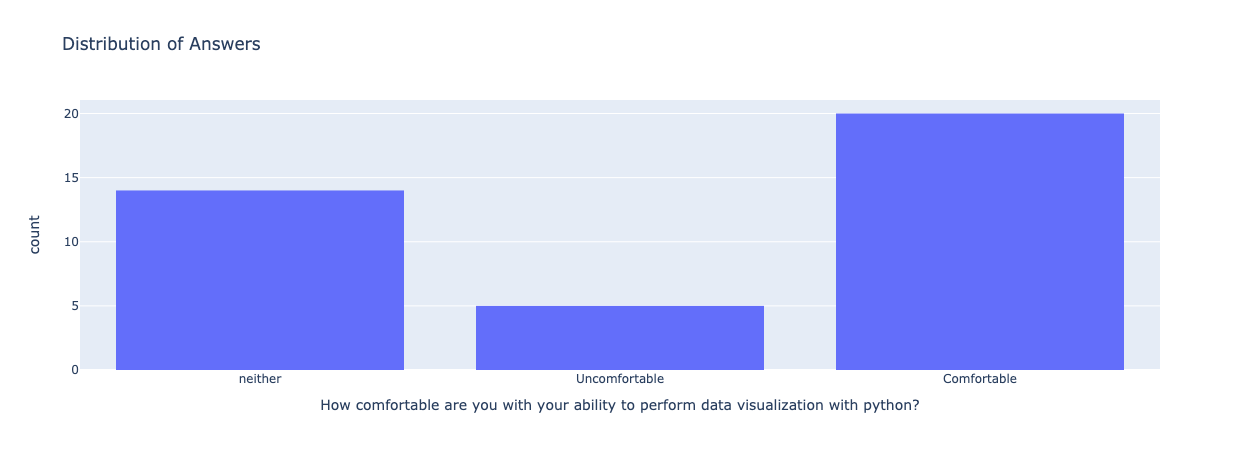

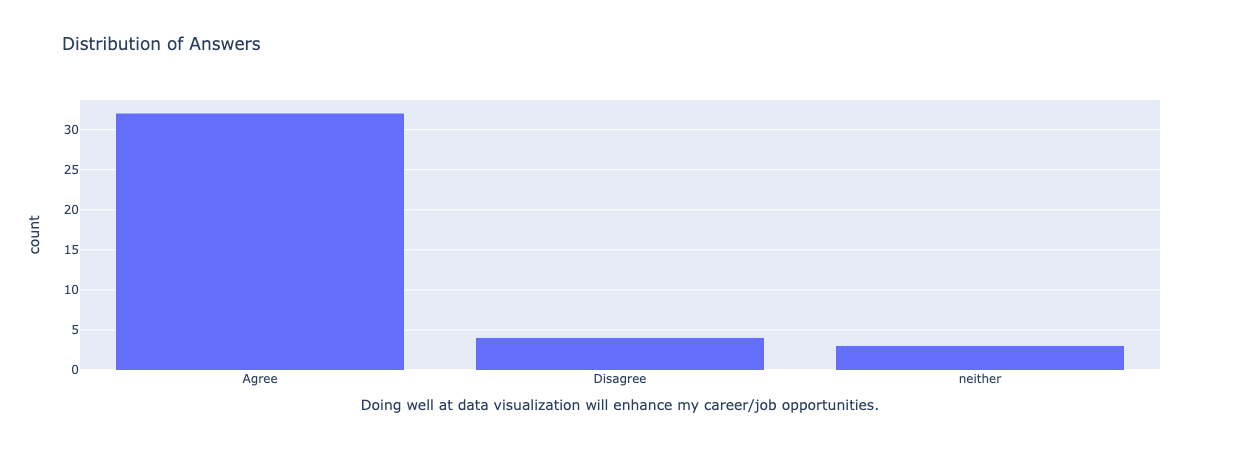

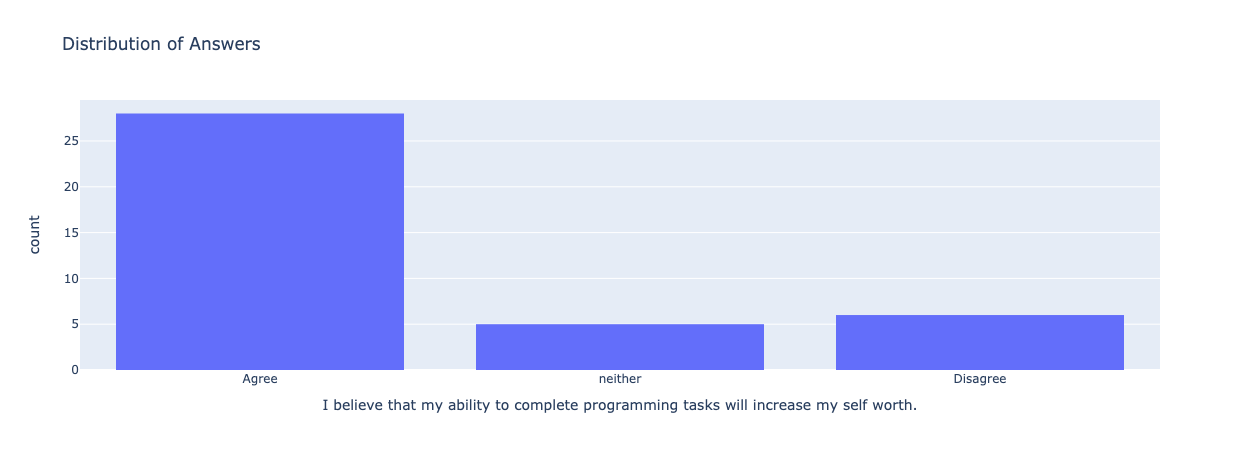

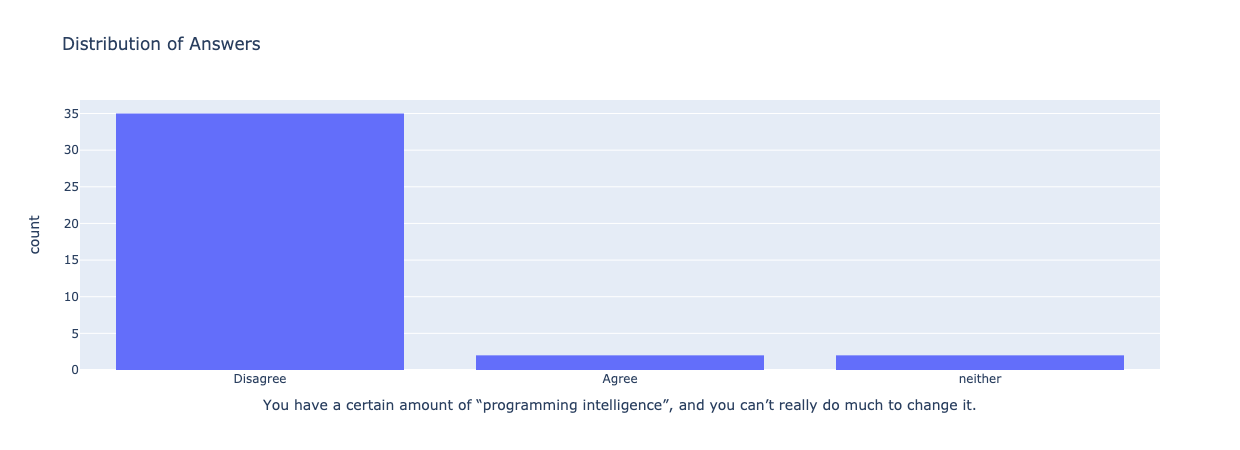

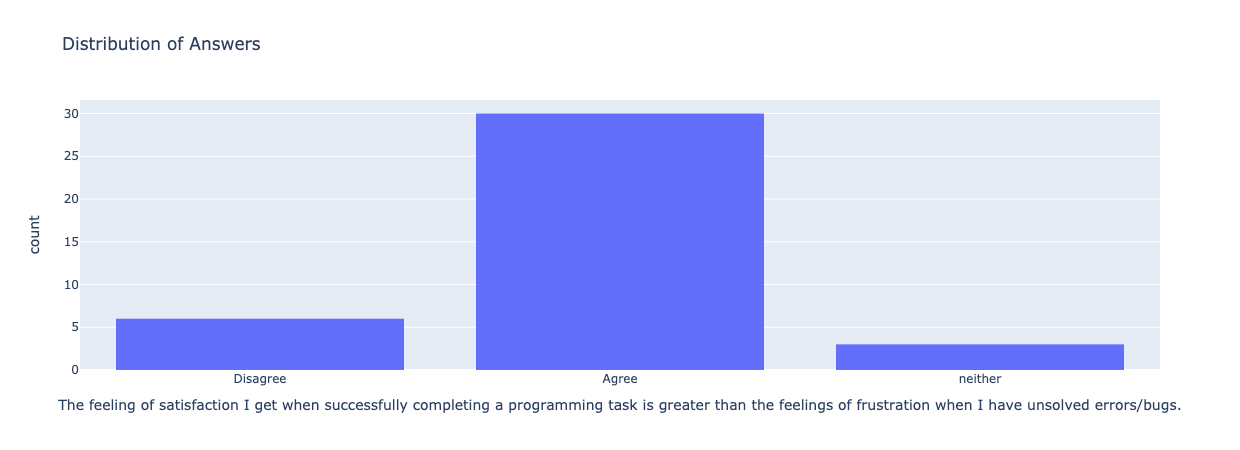

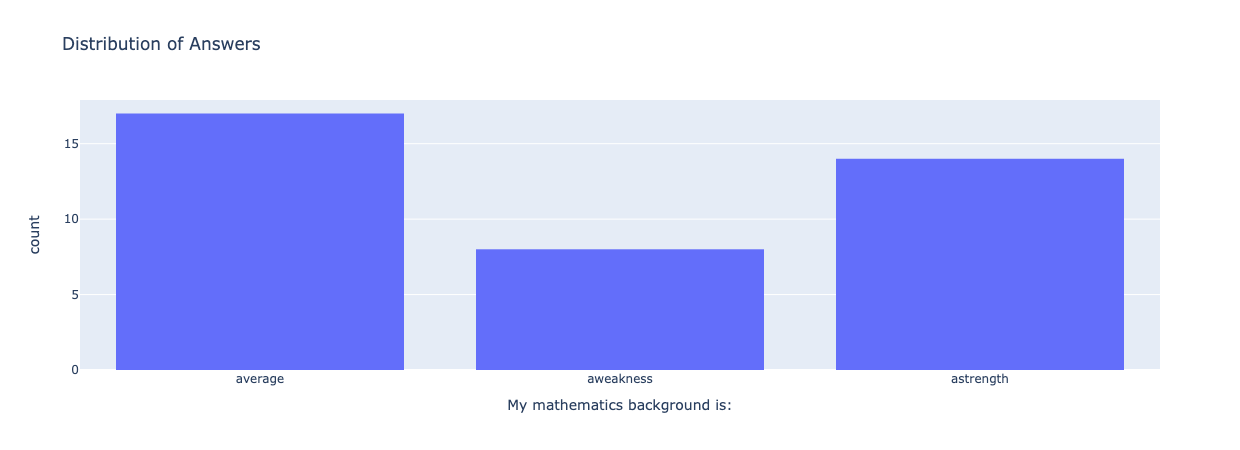

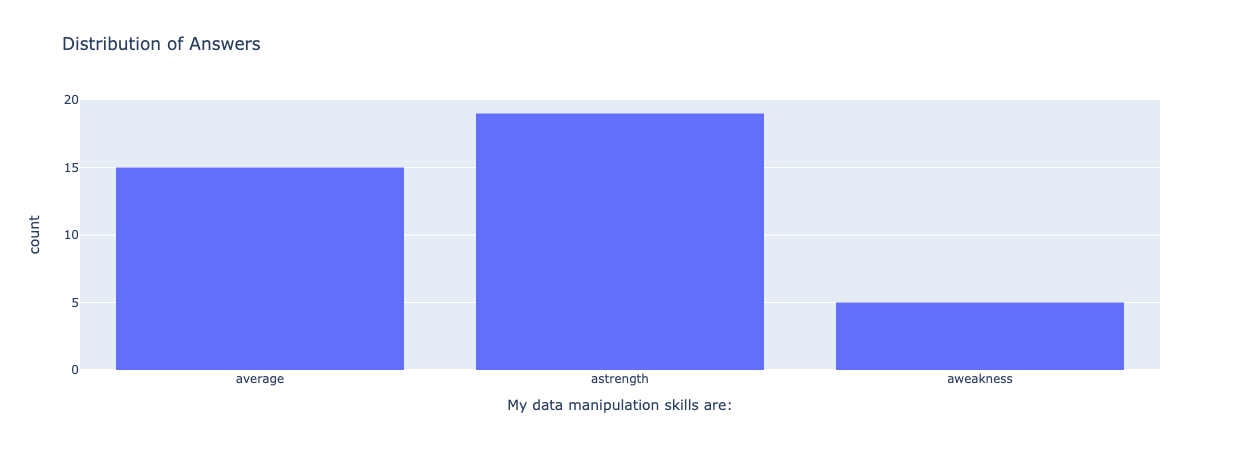

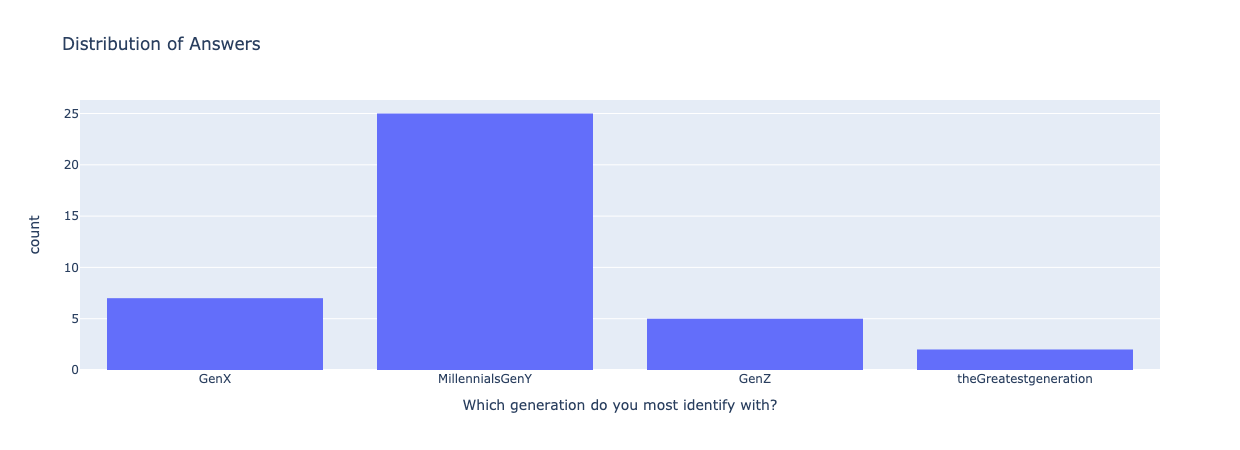

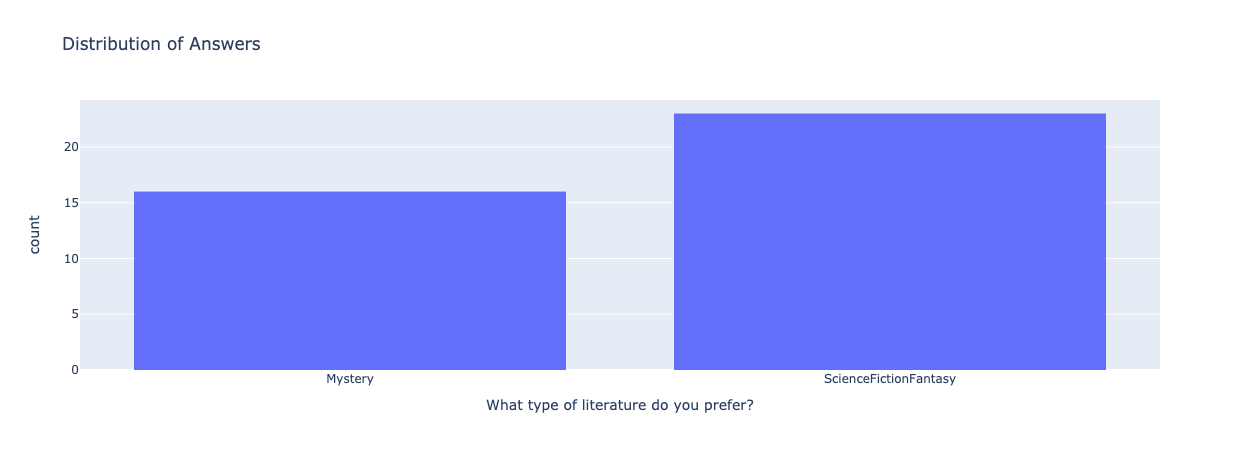

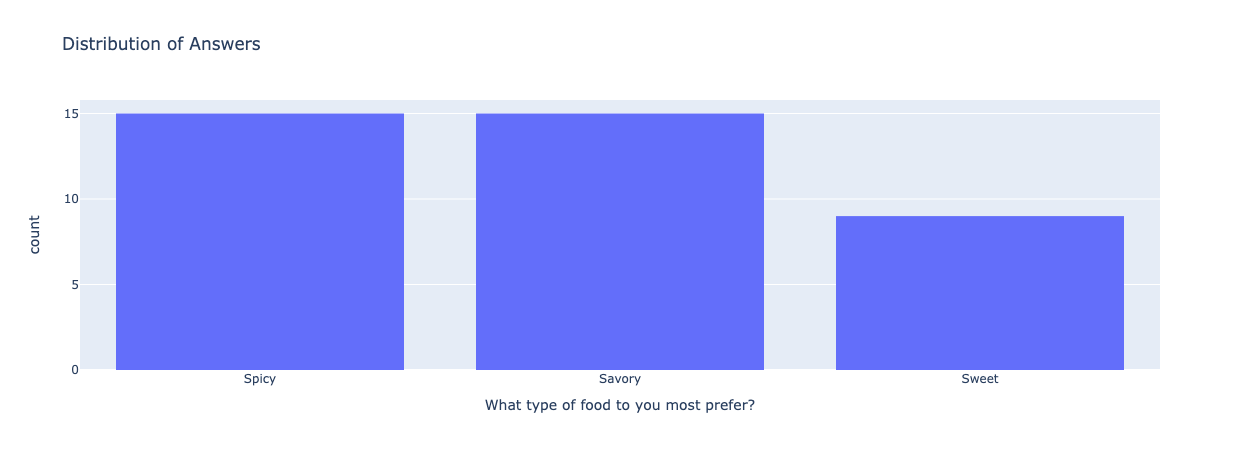

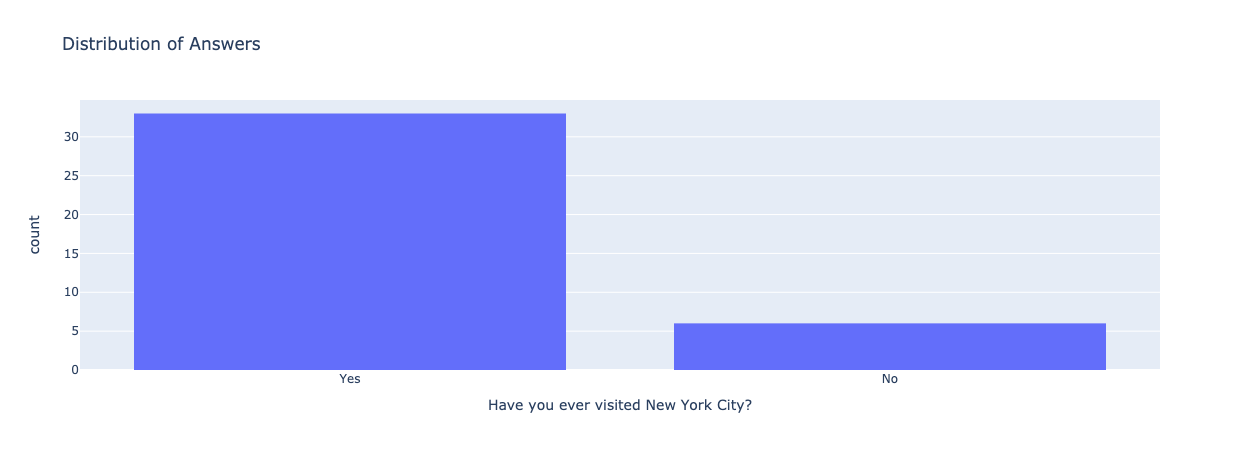

In [9]:

for col in df.loc[:, :"Have you ever visited New York City?"].columns:
#     fig = df[col].plot(kind='hist', title=f'{col}')
    fig = px.histogram(x=col, data_frame=df, title=f"Distribution of Answers")
    
    fig.show()


### Heatmap for learning relationships

In [10]:
# heatmap
labels = list(df.loc[:, :'Have you ever visited New York City?'].columns)

In [11]:
# making heatmap labels more readable
# labels = df.loc[:, :'How comfortable are you with your ability to debug an error in a python script?_encoded'].columns

labels[0] = 'Comfort in debugging'
labels[1] = 'Programming tasks enhancing career'
labels[2] = 'Comfort in data viz'
labels[3] = 'Data viz will help career'
labels[4] = 'Self worth change from coding'
labels[5] = 'Finite programming intel'
labels[6] = 'Feeling of satisfation'
labels[7] = 'Mathematics background'
labels[8] = 'Generation'
labels[9] = 'Type of literature'
labels[10] = 'Preferred food'
labels[11] = 'Been to NY'

(13.0, 0.0)

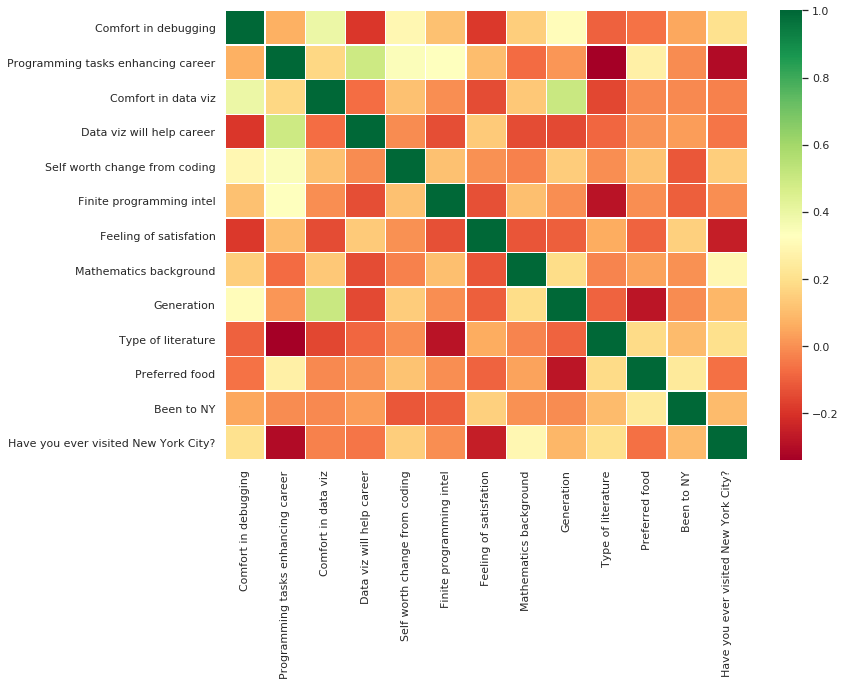

In [12]:
# constructing heatmap
ax = sns.heatmap(df.loc[:,'How comfortable are you with your ability to debug an error in a python script?_encoded':"Have you ever visited New York City?_encoded"].corr(), fmt='', cmap='RdYlGn'
            ,linewidths=.3,
           xticklabels=labels,
           yticklabels=labels);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)



#### From the heatmap we can tell a few tell a few things:
- There is a strong correlation between experience and satisfaction
- There is also a strong correlation between experience and how much data science skills will benefit career
- Those who have been to New York are more satisfied (just joking)

### Building a tree map to better understand breakdown of answers

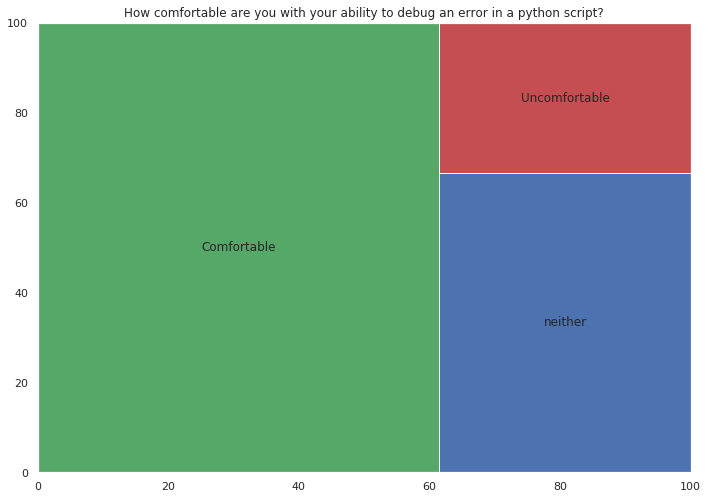

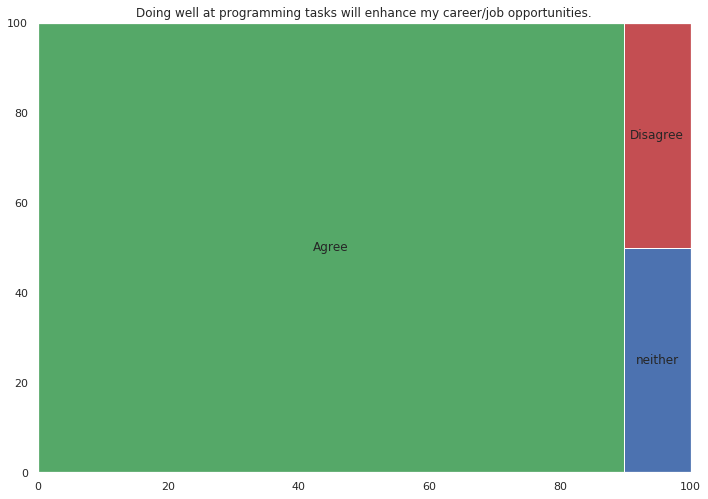

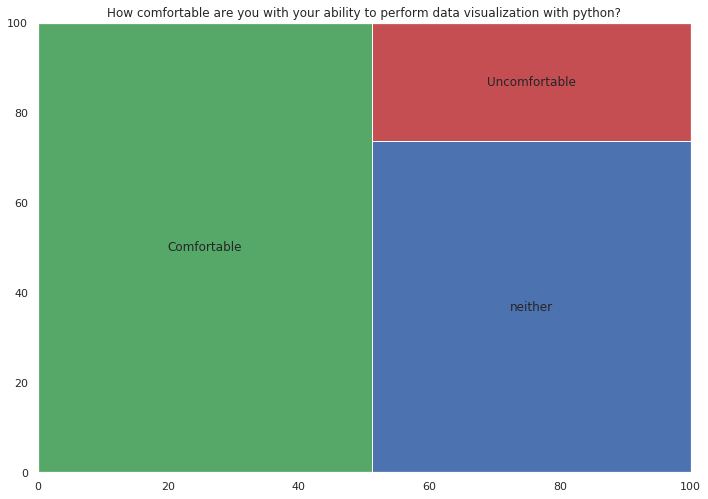

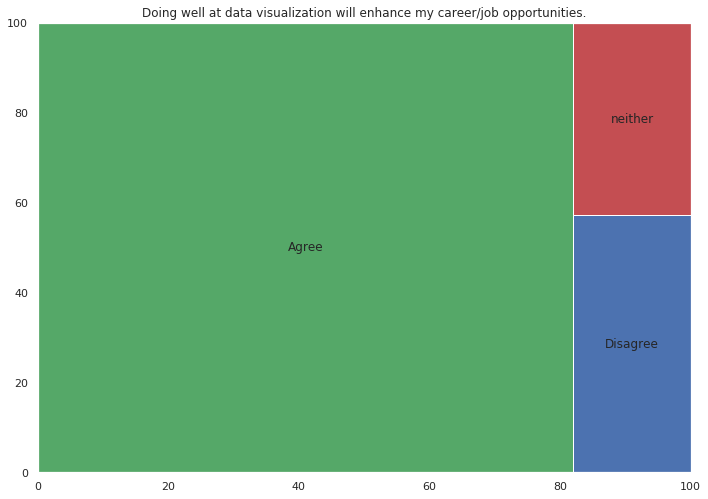

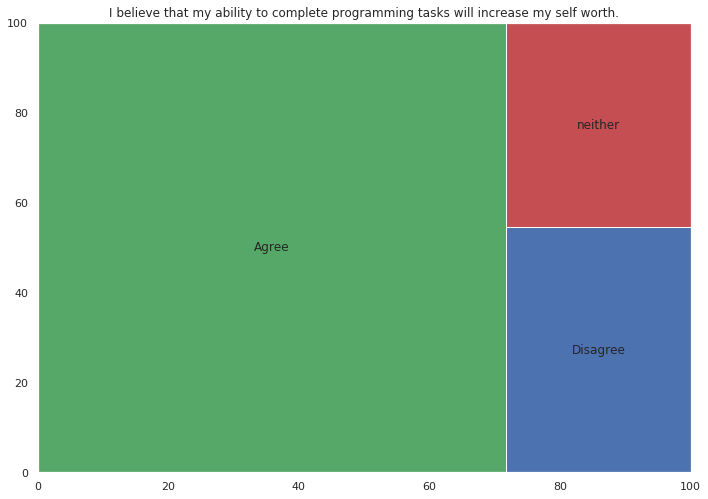

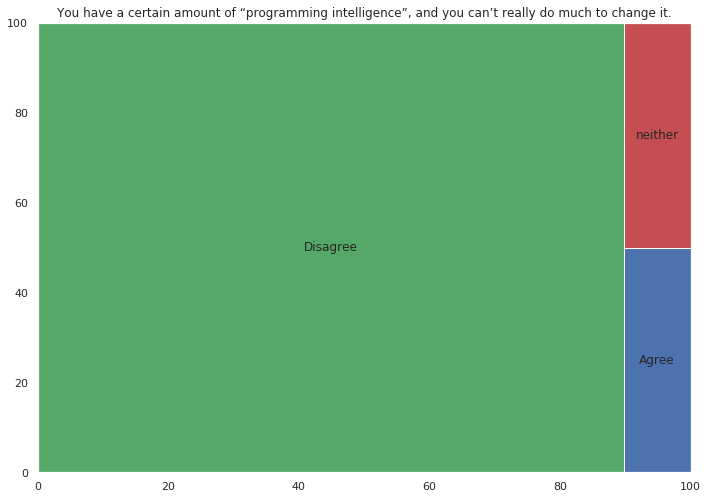

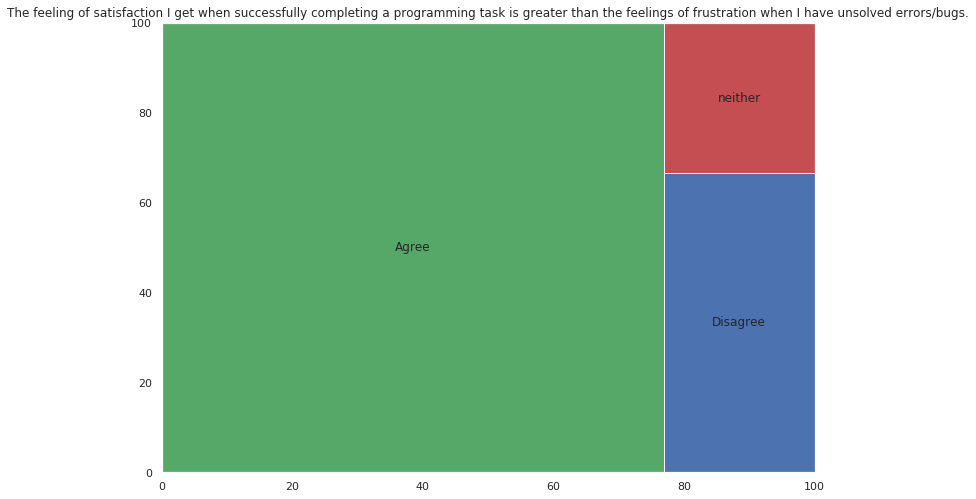

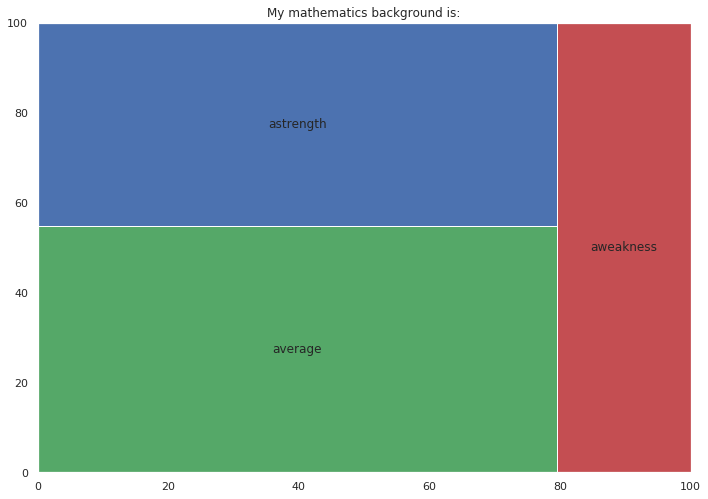

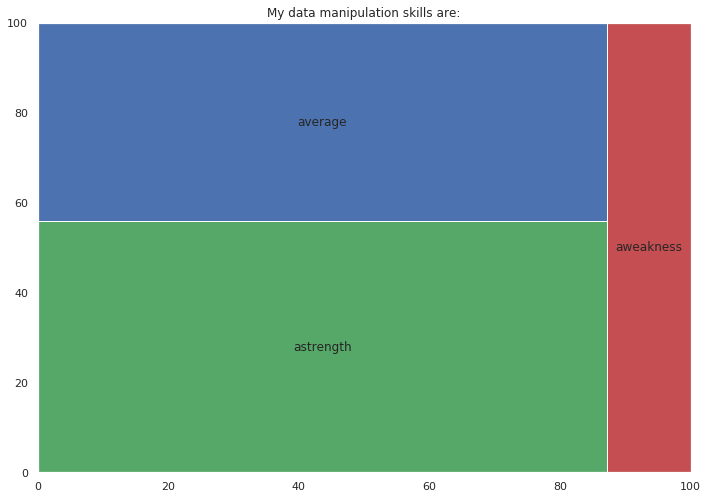

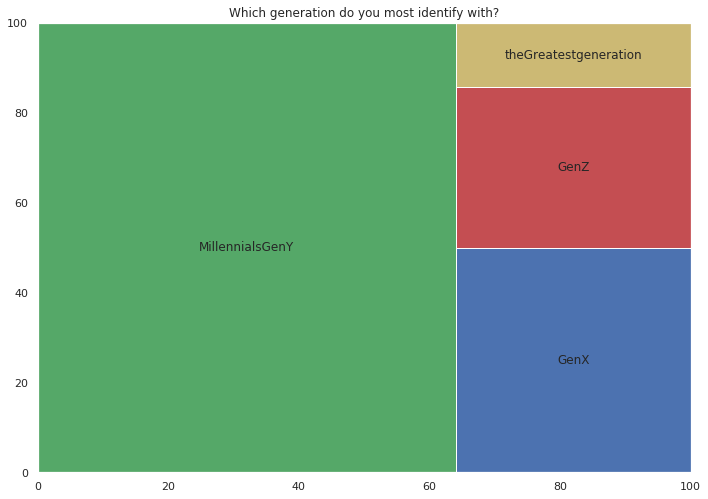

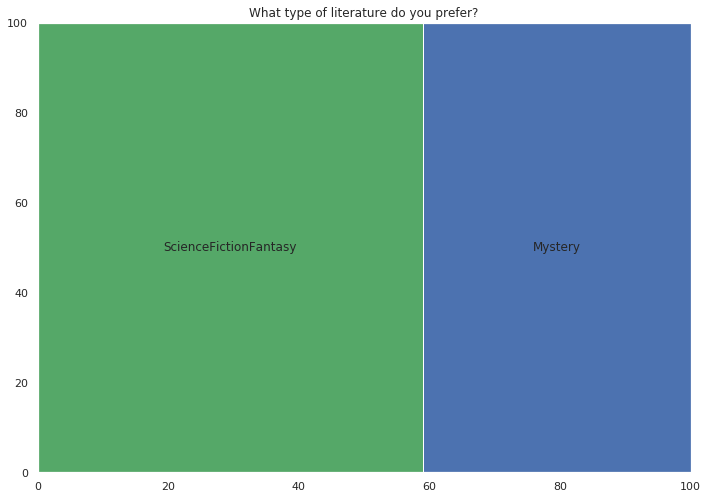

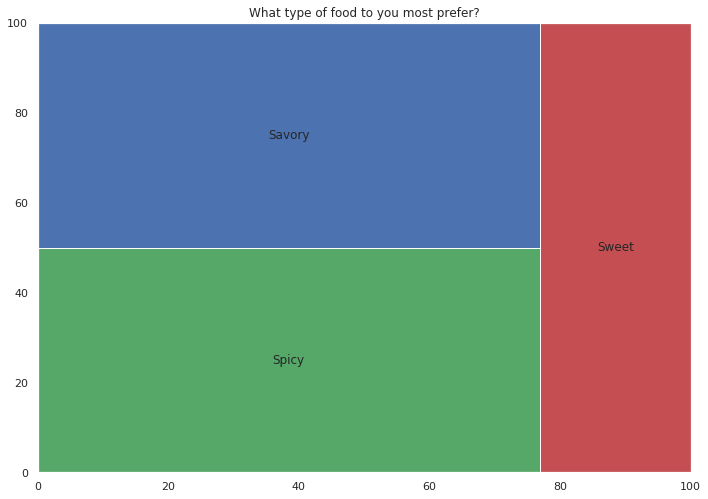

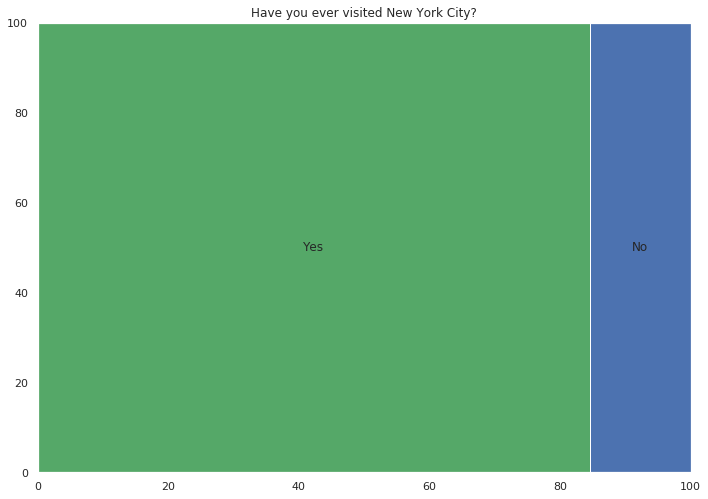

In [13]:
# constructin tree map with squarify

for col in df.loc[:, :'Have you ever visited New York City?'].columns:
    lbl = list(set(df[col]))
    fig = squarify.plot(df[col].value_counts(),
                  label=df[col].value_counts().index, color='gbry')
    plt.title(f'{col}')
    plt.show(fig)

### Using information learned above to analyze a hypothesis

- From our heatmap we can see that certain experience variable (math history, data manipulation skills, debugging skills) are related to how valuable a data science career is

- By faceting our response distribution by our experience variables, maybe we can further see how much experience is related to the value of data science, according the the respondents

In [14]:
# facet by math background, manip skills, debugging
# goal is to analyze how those who have less experience feel
# about how the utility of programming and data viz

# cols we will be analysing by faceting 
# 1. doing well at tasks will enhnace ...
# 2. doing well at viz will enhance ...
# 3. self worth
# 4. programming intelligence
# 5. satisfaction


# can also do facet by demo, e.g. generation, literature, food etc.
def make_facet(facet_column, data_col):
    """helper function for easy facet plotting"""
    fig = px.histogram(data_frame=df, x=df[data_col],
             facet_col=df[facet_column], facet_col_wrap=100, title=f"{data_col}")
    
    fig.update_xaxes(matches=None, visible=False, showticklabels=False)
    
    return fig

# columns of interest : 
# renaming for more readability
df.rename(columns={"How comfortable are you with your ability to debug an error in a python script?" : "Comfort in debugging?",
                   "The feeling of satisfaction I get when successfully completing a programming task is greater than the feelings of frustration when I have unsolved errors/bugs." : "More relief than frustration",
                   "Doing well at data visualization will enhance my career/job opportunities." : "Data viz will help",
                   "Doing well at programming tasks will enhance my career/job opportunities." : "Programming will help",
                   "I believe that my ability to complete programming tasks will increase my self worth." : "Programming will increase self worth"}, inplace=True)
# look at initial df
data_cols = [
    "Comfort in debugging?",
    "More relief than frustration",
    "Data viz will help",
    "Programming will help"
]

#### Faceting by math experience

- be sure to hover over bars to see data

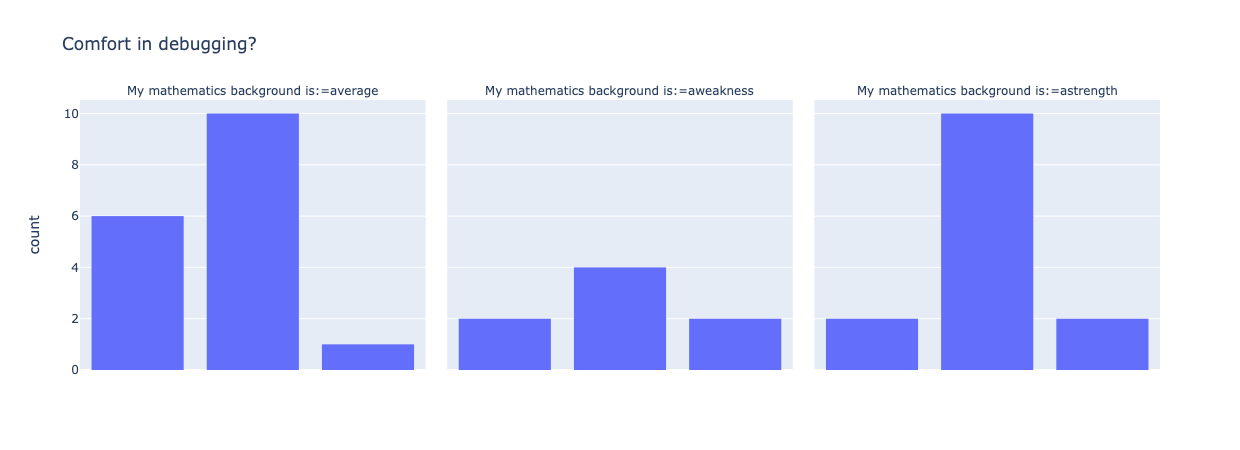

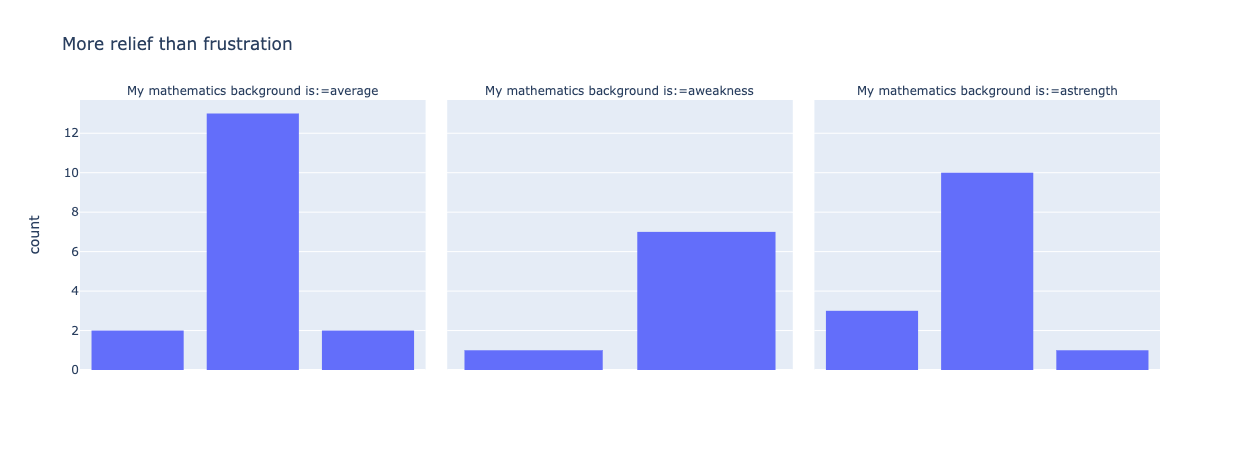

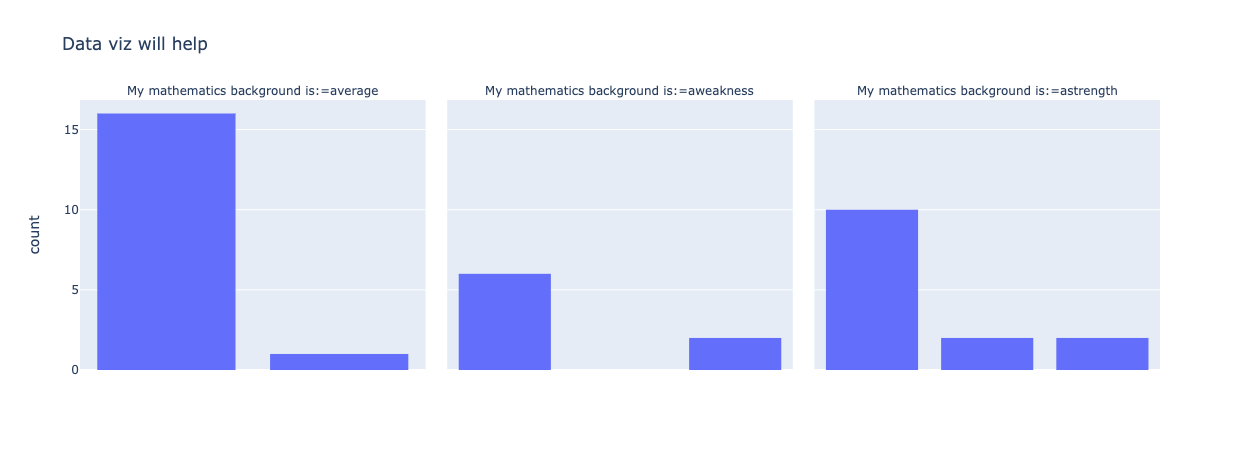

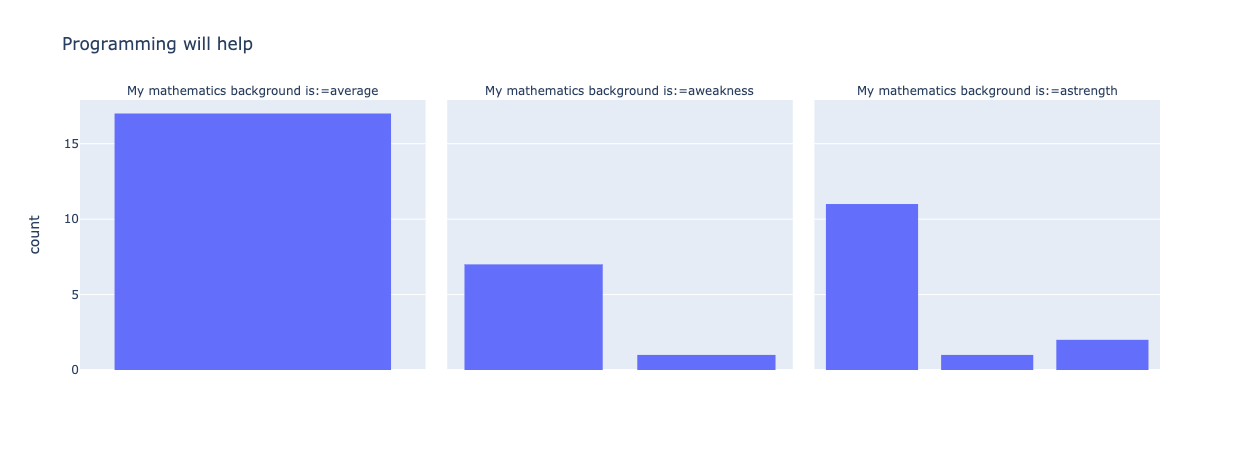

In [15]:
for col in data_cols:
    make_facet(facet_column="My mathematics background is:",
           data_col=col).show()

#### Faceting by data manipulation experience

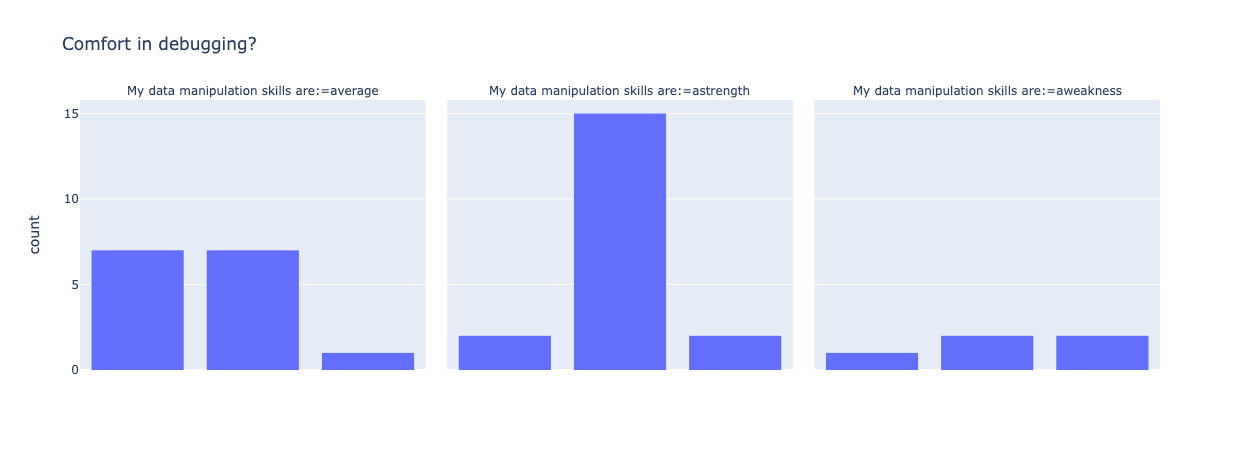

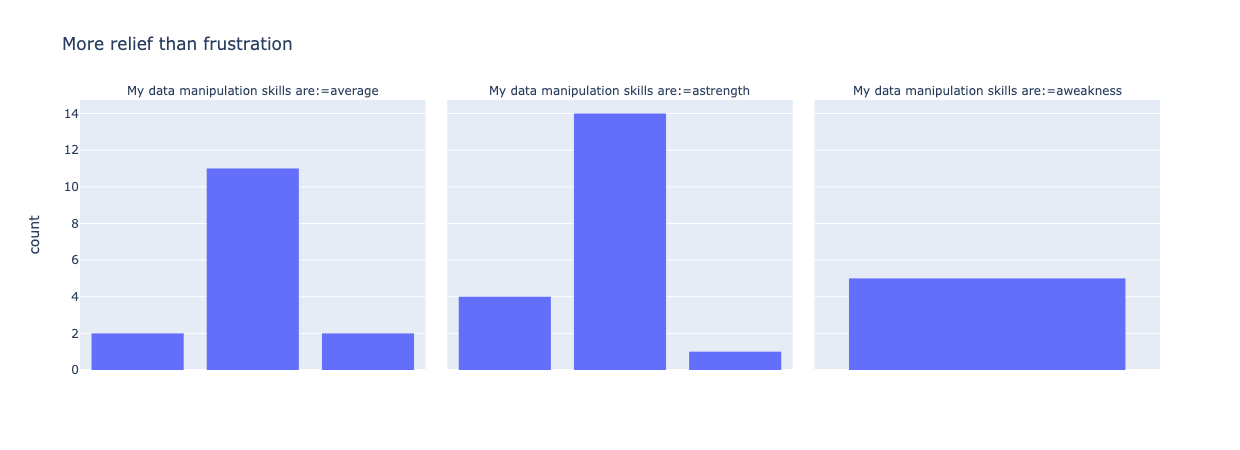

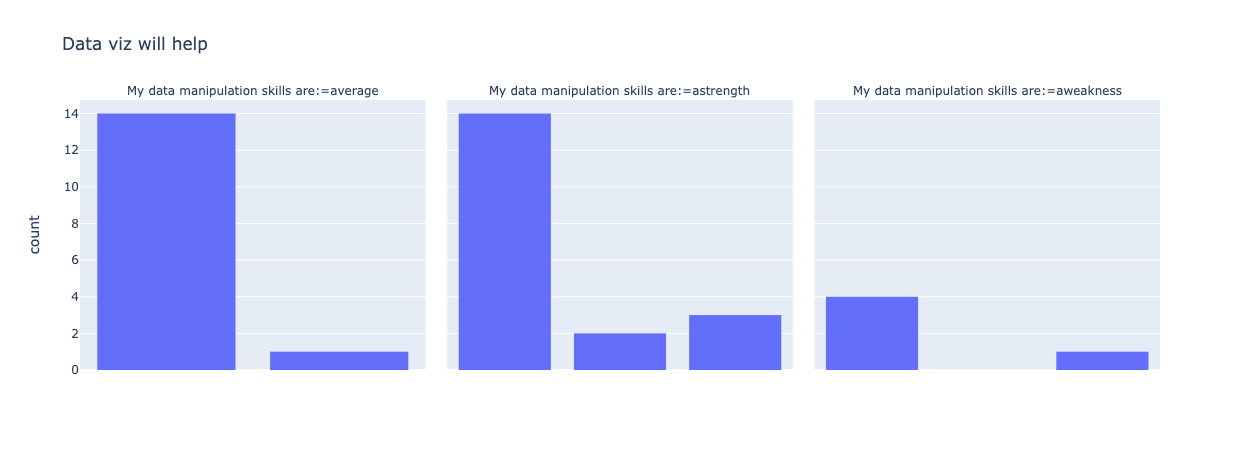

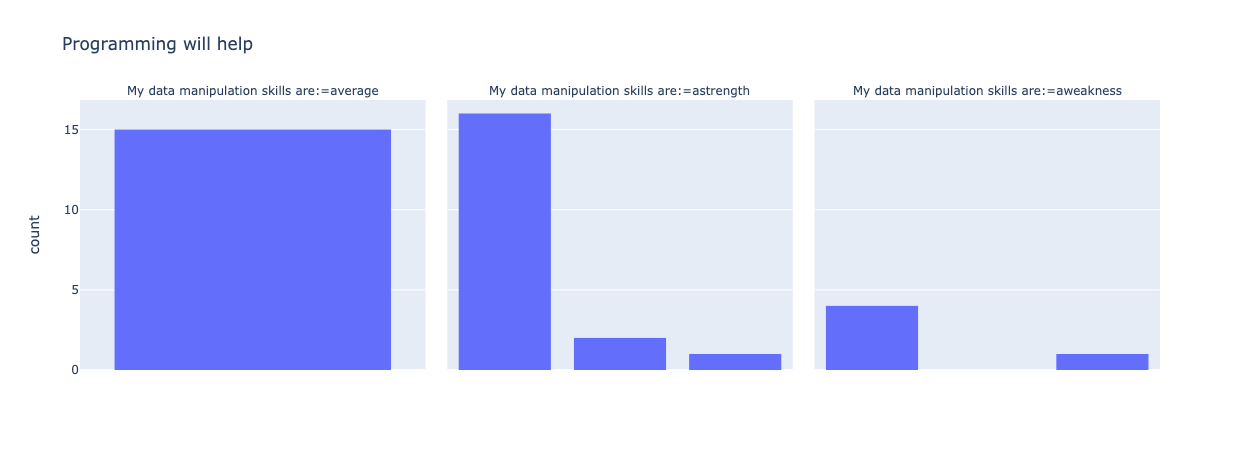

In [16]:
for col in data_cols:
    make_facet(facet_column="My data manipulation skills are:",
           data_col=col).show()

#### Comfort level of debugging a python script

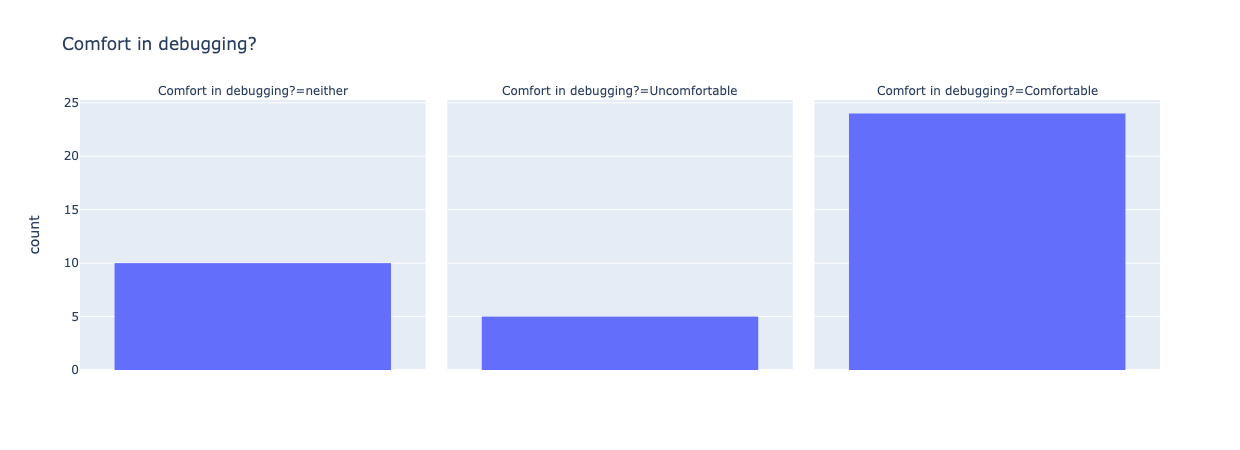

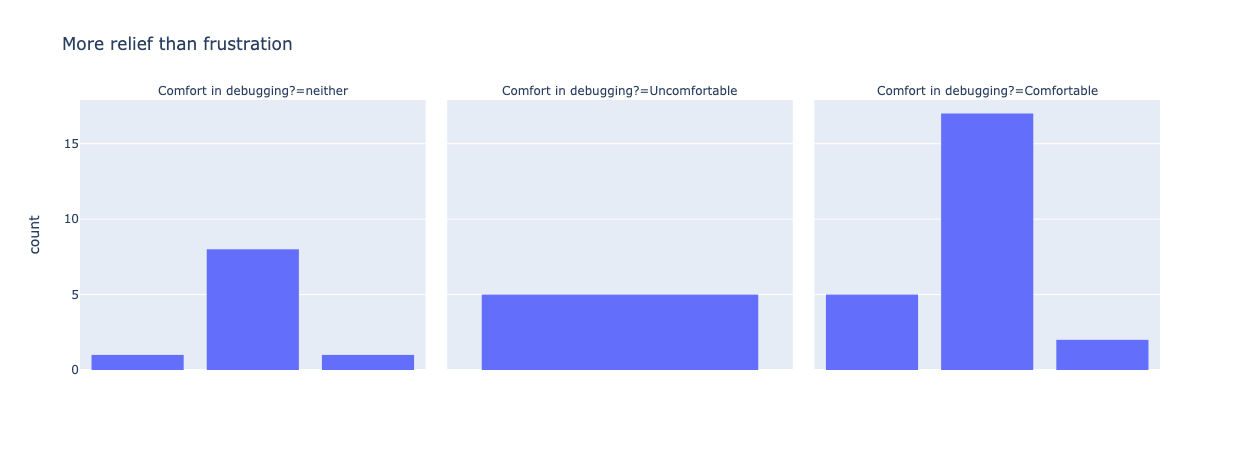

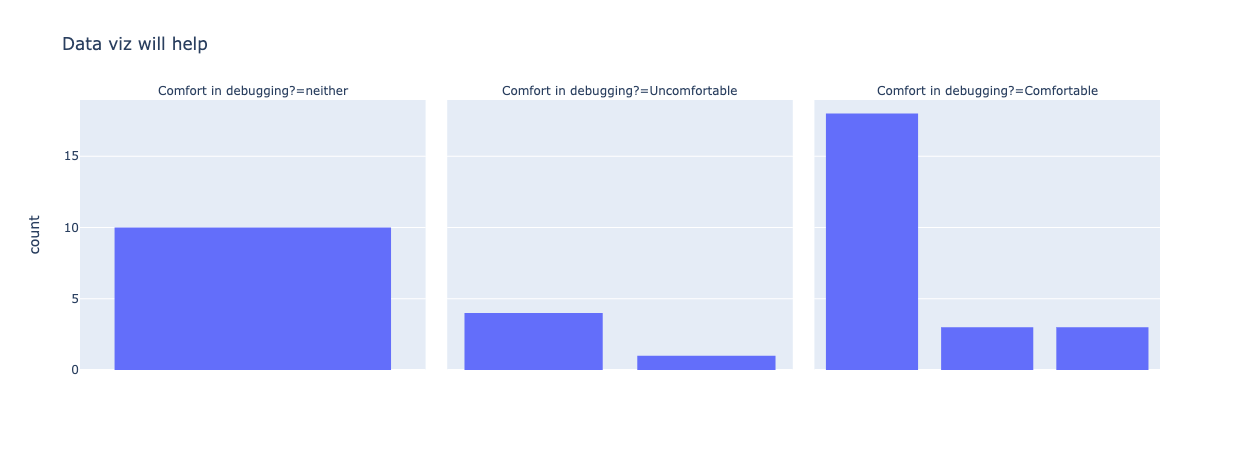

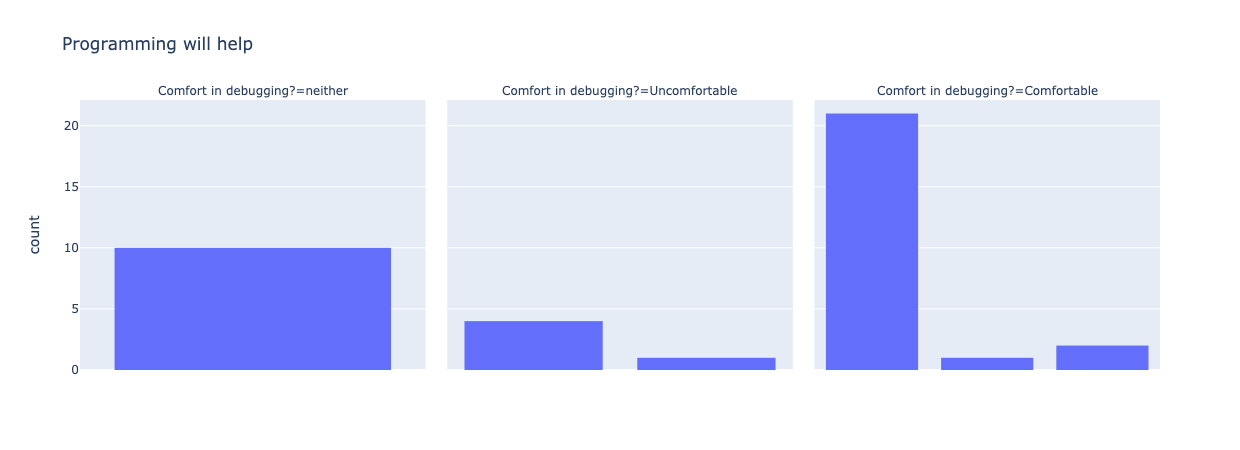

In [17]:
for col in data_cols:
    make_facet(facet_column="Comfort in debugging?",
           data_col=col).show()

## Conclusions
- From our facets above we can expand upon our initial hypothesis:
1. Almost all respondents think that acquiring data science skills will help their career

2. Those with more experience get more utility from solving problems

3. For those students with less experience, it is important to stress how useful these data science methods are for careers. 

- In addition to this analysis, it would be interesting to see responses faceted by different demographic features:
1. age / generation

2. taste in literature